In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import warnings

# seaborn 사용하기
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

warnings.filterwarnings('ignore')

In [128]:
food = pd.read_csv('./Data/seogyodong+korean-ratio.csv')
food.head()

,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,점포수,한식음식점여부
0,2021,1,1000466,동교로17길,CS100001,한식음식점,243935896,14,1
1,2021,1,1000466,동교로17길,CS100002,중식음식점,45393178,1,0
2,2021,1,1000466,동교로17길,CS100003,일식음식점,55589434,3,0
3,2021,1,1000466,동교로17길,CS100006,패스트푸드점,9925407,3,0
4,2021,1,1000466,동교로17길,CS100008,분식전문점,40136157,6,0


## 데이터 정제

### 디테일 점포수 데이터 가져오기

In [129]:
# 하나 만들기
shop = pd.read_csv('./Raw/서울시_우리마을가게_상권분석서비스(상권-점포)_2021년.csv',encoding='euc-kr')

In [130]:
shop.shape

(347357, 15)

In [131]:
for i in range(2014,2021):
    shop_temp = pd.read_csv(f'./Raw/서울시_우리마을가게_상권분석서비스(상권-점포)_{i}년.csv',encoding='euc-kr')
    shop = pd.concat([shop,shop_temp])

shop.shape

(2848231, 15)

### 근본 데이터랑 합치기

In [132]:
food.shape

(1696, 9)

In [133]:
food.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_코드', '상권_코드_명', '서비스_업종_코드', '서비스_업종_코드_명',
       '분기당_매출_금액', '점포수', '한식음식점여부'],
      dtype='object')

In [134]:
shop.columns

Index(['기준_년_코드', '기준_분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명',
       '서비스_업종_코드', '서비스_업종_코드_명', '점포_수', '유사_업종_점포_수', '개업_율', '개업_점포_수',
       '폐업_률', '폐업_점포_수', '프랜차이즈_점포_수'],
      dtype='object')

In [135]:
# shop 필요 없는 column 없애기
shop=shop[['기준_년_코드', '기준_분기_코드','상권_코드', '상권_코드_명',
       '서비스_업종_코드', '서비스_업종_코드_명','유사_업종_점포_수', '개업_율', '개업_점포_수',
       '폐업_률', '폐업_점포_수', '프랜차이즈_점포_수']]

In [136]:
food=pd.merge(food,shop,on=['기준_년_코드', '기준_분기_코드','상권_코드', '상권_코드_명',
       '서비스_업종_코드', '서비스_업종_코드_명'],how='left')

In [137]:
# na 인 값들 찾아보자
food[food['프랜차이즈_점포_수'].isna()]

,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,점포수,한식음식점여부,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
183,2020,3,1000466,동교로17길,CS100006,패스트푸드점,14033994,3,0,NaN,NaN,NaN,NaN,NaN,NaN
185,2020,3,1000466,동교로17길,CS100010,커피-음료,170231023,7,0,NaN,NaN,NaN,NaN,NaN,NaN
186,2020,4,1000466,동교로17길,CS100001,한식음식점,445749786,15,1,NaN,NaN,NaN,NaN,NaN,NaN
188,2020,4,1000466,동교로17길,CS100003,일식음식점,54081177,3,0,NaN,NaN,NaN,NaN,NaN,NaN
191,2020,4,1000466,동교로17길,CS100010,커피-음료,130816872,7,0,NaN,NaN,NaN,NaN,NaN,NaN
444,2020,4,1000467,동교로19길,CS100007,치킨전문점,86787539,2,0,NaN,NaN,NaN,NaN,NaN,NaN
447,2020,4,1000467,동교로19길,CS100010,커피-음료,59127190,11,0,NaN,NaN,NaN,NaN,NaN,NaN
699,2020,4,1000488,신촌로12길,CS100005,제과점,428641815,7,0,NaN,NaN,NaN,NaN,NaN,NaN
700,2020,4,1000488,신촌로12길,CS100006,패스트푸드점,104016676,3,0,NaN,NaN,NaN,NaN,NaN,NaN
703,2020,4,1000488,신촌로12길,CS100010,커피-음료,156737433,20,0,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
# 유사 업종 수 와 점포수 다른 데이터
food[food['점포수'] != food['유사_업종_점포_수']]

,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,점포수,한식음식점여부,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
42,2014,4,1000466,동교로17길,CS100008,분식전문점,87289216,6,0,5.0,20.0,1.0,40.0,2.0,0.0
48,2015,1,1000466,동교로17길,CS100001,한식음식점,684030322,10,1,11.0,9.0,1.0,0.0,0.0,0.0
97,2017,1,1000466,동교로17길,CS100010,커피-음료,243407191,7,0,8.0,13.0,1.0,13.0,1.0,0.0
106,2017,2,1000466,동교로17길,CS100002,중식음식점,126113824,2,0,1.0,0.0,0.0,100.0,1.0,0.0
107,2017,2,1000466,동교로17길,CS100001,한식음식점,521372757,10,1,11.0,9.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689,2020,3,1000504,월드컵로8길,CS100010,커피-음료,118393484,13,0,12.0,0.0,0.0,17.0,2.0,0.0
1691,2020,4,1000504,월드컵로8길,CS100002,중식음식점,148734314,2,0,NaN,NaN,NaN,NaN,NaN,NaN
1693,2020,4,1000504,월드컵로8길,CS100007,치킨전문점,5339921,3,0,NaN,NaN,NaN,NaN,NaN,NaN
1694,2020,4,1000504,월드컵로8길,CS100009,호프-간이주점,53510321,5,0,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
food['알아보자'] = np.abs(food['점포수'] - food['유사_업종_점포_수'])


In [140]:
food.sort_values(by='알아보자').tail(50)

,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,점포수,한식음식점여부,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,알아보자
580,2017,1,1000488,신촌로12길,CS100001,한식음식점,1619623326,37,1,38.0,8.0,3.0,3.0,1.0,3.0,1.0
247,2014,3,1000467,동교로19길,CS100010,커피-음료,229290340,12,0,13.0,15.0,2.0,8.0,1.0,1.0,1.0
1419,2015,3,1000499,월드컵로16길,CS100010,커피-음료,116785910,4,0,5.0,20.0,1.0,0.0,0.0,1.0,1.0
578,2017,1,1000488,신촌로12길,CS100010,커피-음료,476764460,18,0,19.0,5.0,1.0,0.0,0.0,1.0,1.0
251,2014,4,1000467,동교로19길,CS100001,한식음식점,1598100224,31,1,32.0,6.0,2.0,3.0,1.0,1.0,1.0
254,2014,4,1000467,동교로19길,CS100007,치킨전문점,229366861,3,0,2.0,50.0,1.0,100.0,2.0,2.0,1.0
1399,2014,2,1000499,월드컵로16길,CS100001,한식음식점,724676356,10,1,11.0,9.0,1.0,0.0,0.0,2.0,1.0
255,2014,4,1000467,동교로19길,CS100010,커피-음료,235680514,12,0,13.0,8.0,1.0,8.0,1.0,1.0,1.0
256,2015,1,1000467,동교로19길,CS100008,분식전문점,190242560,7,0,6.0,17.0,1.0,17.0,1.0,3.0,1.0
257,2015,1,1000467,동교로19길,CS100009,호프-간이주점,192921216,8,0,9.0,22.0,2.0,0.0,0.0,0.0,1.0


In [141]:
del food['알아보자']

In [142]:
food

,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,점포수,한식음식점여부,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,2021,1,1000466,동교로17길,CS100001,한식음식점,243935896,14,1,14.0,14.0,2.0,14.0,2.0,2.0
1,2021,1,1000466,동교로17길,CS100002,중식음식점,45393178,1,0,1.0,0.0,0.0,0.0,0.0,0.0
2,2021,1,1000466,동교로17길,CS100003,일식음식점,55589434,3,0,3.0,0.0,0.0,0.0,0.0,0.0
3,2021,1,1000466,동교로17길,CS100006,패스트푸드점,9925407,3,0,3.0,0.0,0.0,0.0,0.0,0.0
4,2021,1,1000466,동교로17길,CS100008,분식전문점,40136157,6,0,6.0,17.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,2020,4,1000504,월드컵로8길,CS100002,중식음식점,148734314,2,0,NaN,NaN,NaN,NaN,NaN,NaN
1692,2020,4,1000504,월드컵로8길,CS100003,일식음식점,327606908,4,0,4.0,0.0,0.0,25.0,1.0,0.0
1693,2020,4,1000504,월드컵로8길,CS100007,치킨전문점,5339921,3,0,NaN,NaN,NaN,NaN,NaN,NaN
1694,2020,4,1000504,월드컵로8길,CS100009,호프-간이주점,53510321,5,0,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
# 유사 업종 점포수와 점포수 별반 차이 없는 거 확인했으니 지우자
del food['유사_업종_점포_수']

In [144]:
# na 어떻게 처리할지 알아보자.
food[food['프랜차이즈_점포_수'].isna()]

,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,점포수,한식음식점여부,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
183,2020,3,1000466,동교로17길,CS100006,패스트푸드점,14033994,3,0,NaN,NaN,NaN,NaN,NaN
185,2020,3,1000466,동교로17길,CS100010,커피-음료,170231023,7,0,NaN,NaN,NaN,NaN,NaN
186,2020,4,1000466,동교로17길,CS100001,한식음식점,445749786,15,1,NaN,NaN,NaN,NaN,NaN
188,2020,4,1000466,동교로17길,CS100003,일식음식점,54081177,3,0,NaN,NaN,NaN,NaN,NaN
191,2020,4,1000466,동교로17길,CS100010,커피-음료,130816872,7,0,NaN,NaN,NaN,NaN,NaN
444,2020,4,1000467,동교로19길,CS100007,치킨전문점,86787539,2,0,NaN,NaN,NaN,NaN,NaN
447,2020,4,1000467,동교로19길,CS100010,커피-음료,59127190,11,0,NaN,NaN,NaN,NaN,NaN
699,2020,4,1000488,신촌로12길,CS100005,제과점,428641815,7,0,NaN,NaN,NaN,NaN,NaN
700,2020,4,1000488,신촌로12길,CS100006,패스트푸드점,104016676,3,0,NaN,NaN,NaN,NaN,NaN
703,2020,4,1000488,신촌로12길,CS100010,커피-음료,156737433,20,0,NaN,NaN,NaN,NaN,NaN


In [145]:
food.columns # 9 : 13

Index(['기준_년_코드', '기준_분기_코드', '상권_코드', '상권_코드_명', '서비스_업종_코드', '서비스_업종_코드_명',
       '분기당_매출_금액', '점포수', '한식음식점여부', '개업_율', '개업_점포_수', '폐업_률', '폐업_점포_수',
       '프랜차이즈_점포_수'],
      dtype='object')

In [146]:
# na값 처리 위해서 새로 넣은 데이터의 범위 알아보기
for i in range(9,14):
    min = food.iloc[:,i].min()
    max = food.iloc[:,i].max()

    print(food.columns[i],'의 범위 :',min,'~',max)

개업_율 의 범위 : 0.0 ~ 100.0
개업_점포_수 의 범위 : 0.0 ~ 6.0
폐업_률 의 범위 : 0.0 ~ 100.0
폐업_점포_수 의 범위 : 0.0 ~ 5.0
프랜차이즈_점포_수 의 범위 : 0.0 ~ 5.0


In [147]:
# 0 으로 해야될듯 개업 점포수와 폐업 점포수 프렌차이즈 점포수 의 데이터의 범위가 크지 않으므로
# 그러면 개업율과 폐업율도 0이므로 그냥 0으로 채우자.
food=food.fillna(0)

In [148]:
# na값 있는지 확인 : 없다.
food[food['프랜차이즈_점포_수'].isna()]

,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,점포수,한식음식점여부,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수


---

### Feature 추가할 거 선택하기

In [149]:
food.head()


,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,점포수,한식음식점여부,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,2021,1,1000466,동교로17길,CS100001,한식음식점,243935896,14,1,14.0,2.0,14.0,2.0,2.0
1,2021,1,1000466,동교로17길,CS100002,중식음식점,45393178,1,0,0.0,0.0,0.0,0.0,0.0
2,2021,1,1000466,동교로17길,CS100003,일식음식점,55589434,3,0,0.0,0.0,0.0,0.0,0.0
3,2021,1,1000466,동교로17길,CS100006,패스트푸드점,9925407,3,0,0.0,0.0,0.0,0.0,0.0
4,2021,1,1000466,동교로17길,CS100008,분식전문점,40136157,6,0,17.0,1.0,0.0,0.0,0.0


In [150]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1696 entries, 0 to 1695
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준_년_코드      1696 non-null   int64  
 1   기준_분기_코드     1696 non-null   int64  
 2   상권_코드        1696 non-null   int64  
 3   상권_코드_명      1696 non-null   object 
 4   서비스_업종_코드    1696 non-null   object 
 5   서비스_업종_코드_명  1696 non-null   object 
 6   분기당_매출_금액    1696 non-null   int64  
 7   점포수          1696 non-null   int64  
 8   한식음식점여부      1696 non-null   int64  
 9   개업_율         1696 non-null   float64
 10  개업_점포_수      1696 non-null   float64
 11  폐업_률         1696 non-null   float64
 12  폐업_점포_수      1696 non-null   float64
 13  프랜차이즈_점포_수   1696 non-null   float64
dtypes: float64(5), int64(6), object(3)
memory usage: 198.8+ KB


In [151]:
food['프랜차이즈']=food['프랜차이즈_점포_수'].astype('category')
food['프랜차이즈'].cat.categories = ['0개','1개','2개','3개','4개','5개']

In [152]:
food['프랜차이즈'].unique()

['2개', '0개', '1개', '3개', '4개', '5개']
Categories (6, object): ['0개', '1개', '2개', '3개', '4개', '5개']

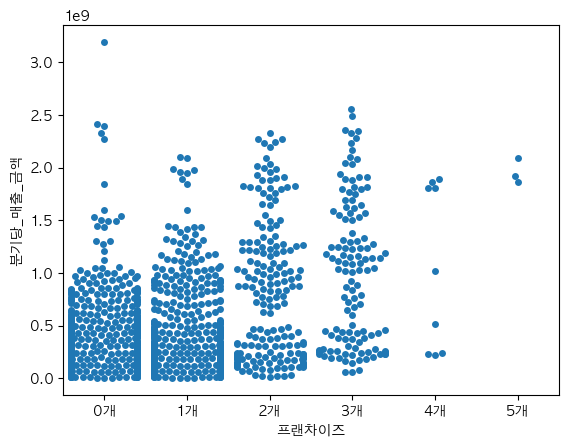

In [153]:
sns.swarmplot(
    x='프랜차이즈',
    y='분기당_매출_금액',
    data=food
)

plt.show()

### 사용가능할듯 : 0-1 분포 비슷 2-3 분포 비슷 4-5 분포 비슷 그런 느낌스

### 분포 비슷한 거 끼리 묶어서 새로운 feature 만들기

In [154]:
food['프랜차이즈'] = [
                    0 if i <= 1 else
                    1 if i <= 3 else 2
                    for i in food['프랜차이즈_점포_수']
                ]

In [155]:
del food['개업_율']
del food['개업_점포_수']
del food['폐업_률']
del food['폐업_점포_수']
del food['프랜차이즈_점포_수']

In [156]:
food.to_csv('./Data/seogyodong+korean-ratio+franchise.csv',index=False)